# Model Training


In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('cleansed_data.csv')
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization,numchange,level1_diag_1
0,2,0,5,6,25,1,1,41,0,1,...,0,0,0,0,0,0,0,0,0,4
1,2,0,15,1,1,7,3,59,0,18,...,0,0,0,0,1,1,0,0,1,0
2,0,0,25,1,1,7,2,11,5,13,...,0,0,0,0,0,1,0,3,0,0
3,2,1,35,1,1,7,2,44,1,16,...,0,0,0,0,1,1,0,0,1,0
4,2,1,45,1,1,7,1,51,0,8,...,0,0,0,0,1,1,0,0,0,8


In [3]:
X=df.drop('readmitted',axis=1)
y=df['readmitted']

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Logistic Regression

In [5]:
logit=LogisticRegression(penalty='elasticnet', C=1.0, solver='saga', l1_ratio=0.5)
logit.fit(X_train,y_train)

C:\Users\sanjh\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [6]:
y_pred=logit.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))

Accuracy is 0.92
Precision is 0.25
Recall is 0.00


As we know from data visulazation that we have class imbalance which is causing high accuracy but lower precisiona and recall .So we use SMOTE to bring some balance to our dataset

SMOTE: This is the class from the imblearn library that implements the Synthetic Minority Over-sampling Technique. SMOTE creates synthetic data points for the minority class (the class with fewer samples) by interpolating between existing minority class examples.

Counter: This is a utility from the collections module that helps count the frequency of occurrences in a collection (like a list, or in this case, a target variable y_train).

In [7]:
# Check the original dataset class distribution
print('Original dataset shape {}'.format(Counter(y_train)))

# Apply SMOTE to balance the class distribution
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)

# Check the new dataset class distribution
print('New dataset shape {}'.format(Counter(train_output_new)))


Original dataset shape Counter({0: 52085, 1: 5129})
New dataset shape Counter({0: 52085, 1: 52085})


In [8]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=42)
logit = LogisticRegression()
logit.fit(X_train, y_train)

C:\Users\sanjh\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
y_pred=logit.predict(X_test)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))

accuracy_logit = accuracy_score(y_test, y_pred)
precision_logit = precision_score(y_test, y_pred)
recall_logit = recall_score(y_test, y_pred)

Accuracy is 0.70
Precision is 0.69
Recall is 0.74


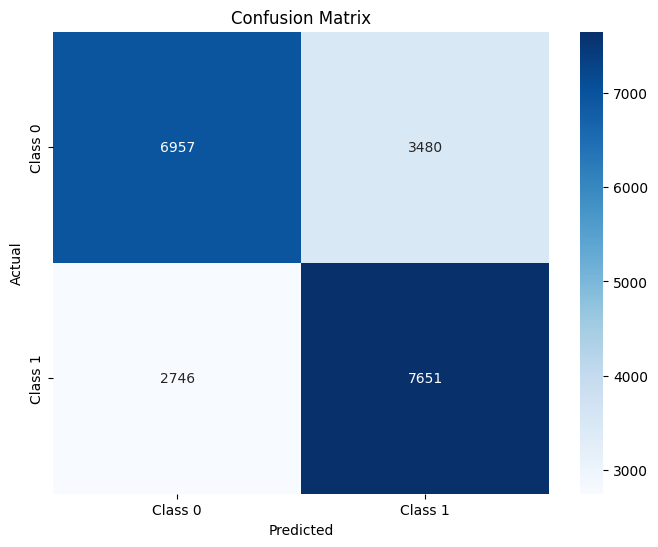

In [10]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Decision Tree Classifier

In [11]:
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [12]:
y_pred=dtree.predict(X_test)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))

accuracy_dtree = accuracy_score(y_test, y_pred)
precision_dtree = precision_score(y_test, y_pred)
recall_dtree = recall_score(y_test, y_pred)

Accuracy is 0.82
Precision is 0.82
Recall is 0.84


In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)


F1-Score: 0.8254631828978622


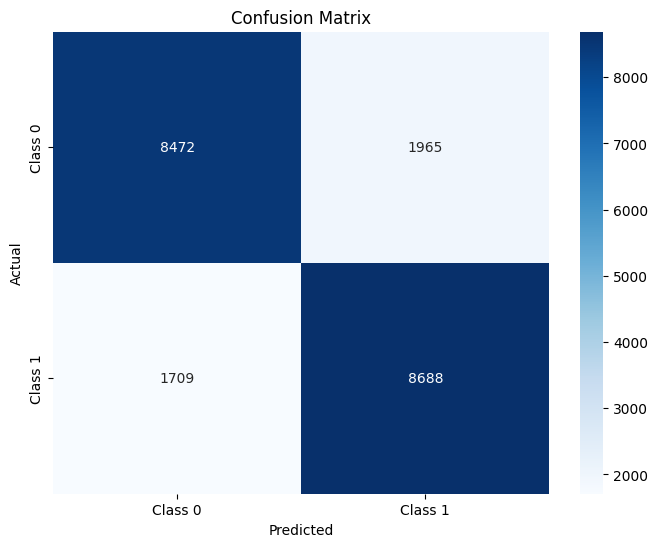

In [14]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest Ensemble (Bagging)

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred=rf_model.predict(X_test)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))

accuracy_rm = accuracy_score(y_test, y_pred)
precision_rm = precision_score(y_test, y_pred)
recall_rm = recall_score(y_test, y_pred)

Accuracy is 0.91
Precision is 0.92
Recall is 0.90


In [17]:
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)


F1-Score: 0.908613394290161


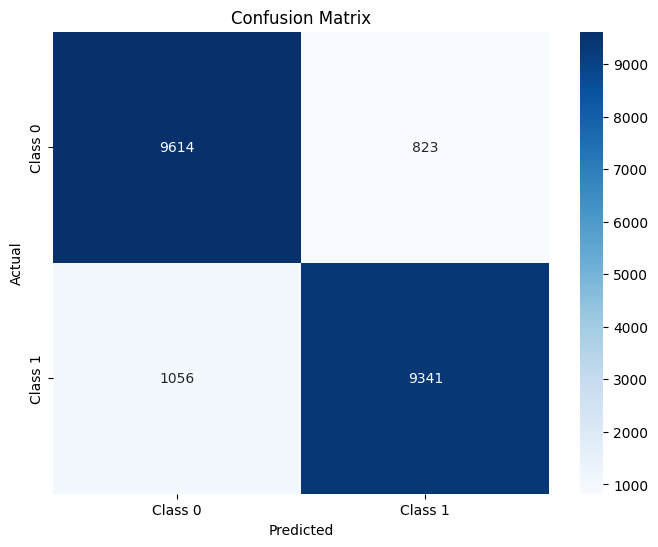

In [18]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model Comparison

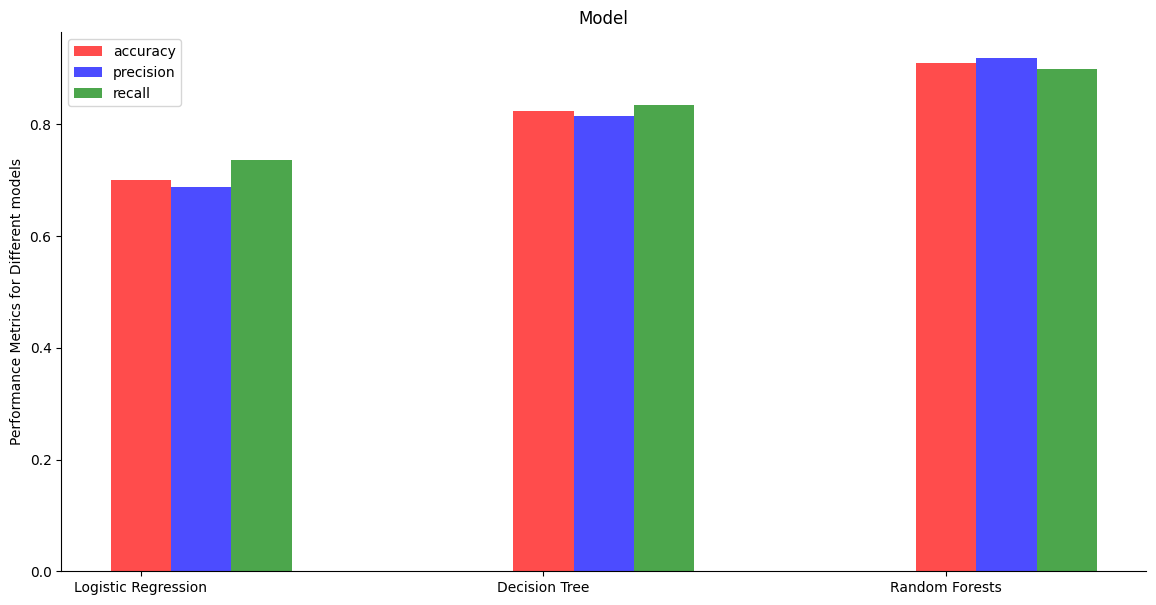

In [19]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [accuracy_logit, accuracy_dtree, accuracy_rm]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [precision_logit, precision_dtree, precision_rm]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests' ]
values = [recall_logit, recall_dtree, recall_rm, ]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()  

From the above graph we can see Random Forest performs the best.

now let us export our best model that is random forest

In [20]:
import joblib
joblib.dump(rf_model,'final_model.joblib')

['final_model.joblib']

In [21]:
import gzip
import joblib

# Load the model
model = joblib.load("final_model.joblib")

# Save the model using gzip compression
with gzip.open("final_model_compressed.joblib.gz", "wb") as f:
    joblib.dump(model, f)
